## Linear Regression for Predicting Student Exam Scores

## 1. Problem Definition

Our goal is to predict student exam scores based on lifestyle, academic habits, and socio-economic factors using Linear Regression and compare its performance with Decision Trees and Random Forest.

## 2. Data Loading & Inspection

In [1]:
# Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r"C:\Users\LENOVO\Documents\ML_Summative\student_habits_performance.csv")

# Preview the data
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,Location
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2,Ethiopia
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0,Uganda
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3,Rwanda
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8,Kenya
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4,Rwanda


## 3. Data Cleaning & Preprocessing

**3.1 Convert categorical variables for modeling**

In [2]:
# Encode binary columns Yes/No to 1/0
binary_columns = ['part_time_job', 'extracurricular_participation']
df[binary_columns] = df[binary_columns].apply(lambda x: x.map({'Yes': 1, 'No': 0}))

# One-Hot Encoding for categorical variables
df = pd.get_dummies(df, columns=['gender', 'diet_quality', 'parental_education_level', 
                                  'internet_quality', 'Location'], drop_first=True)

# Drop unnecessary ID column
df.drop(columns=['student_id'], inplace=True)

**3.2. Standardize Numeric Features**

In [3]:
from sklearn.preprocessing import StandardScaler

# Select numeric columns to scale
numeric_cols = ['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours',
                'attendance_percentage', 'sleep_hours', 'exercise_frequency', 'mental_health_rating']

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

## 4. Exploratory Data Analysis (EDA)

**4.1 Correlation Heatmap**

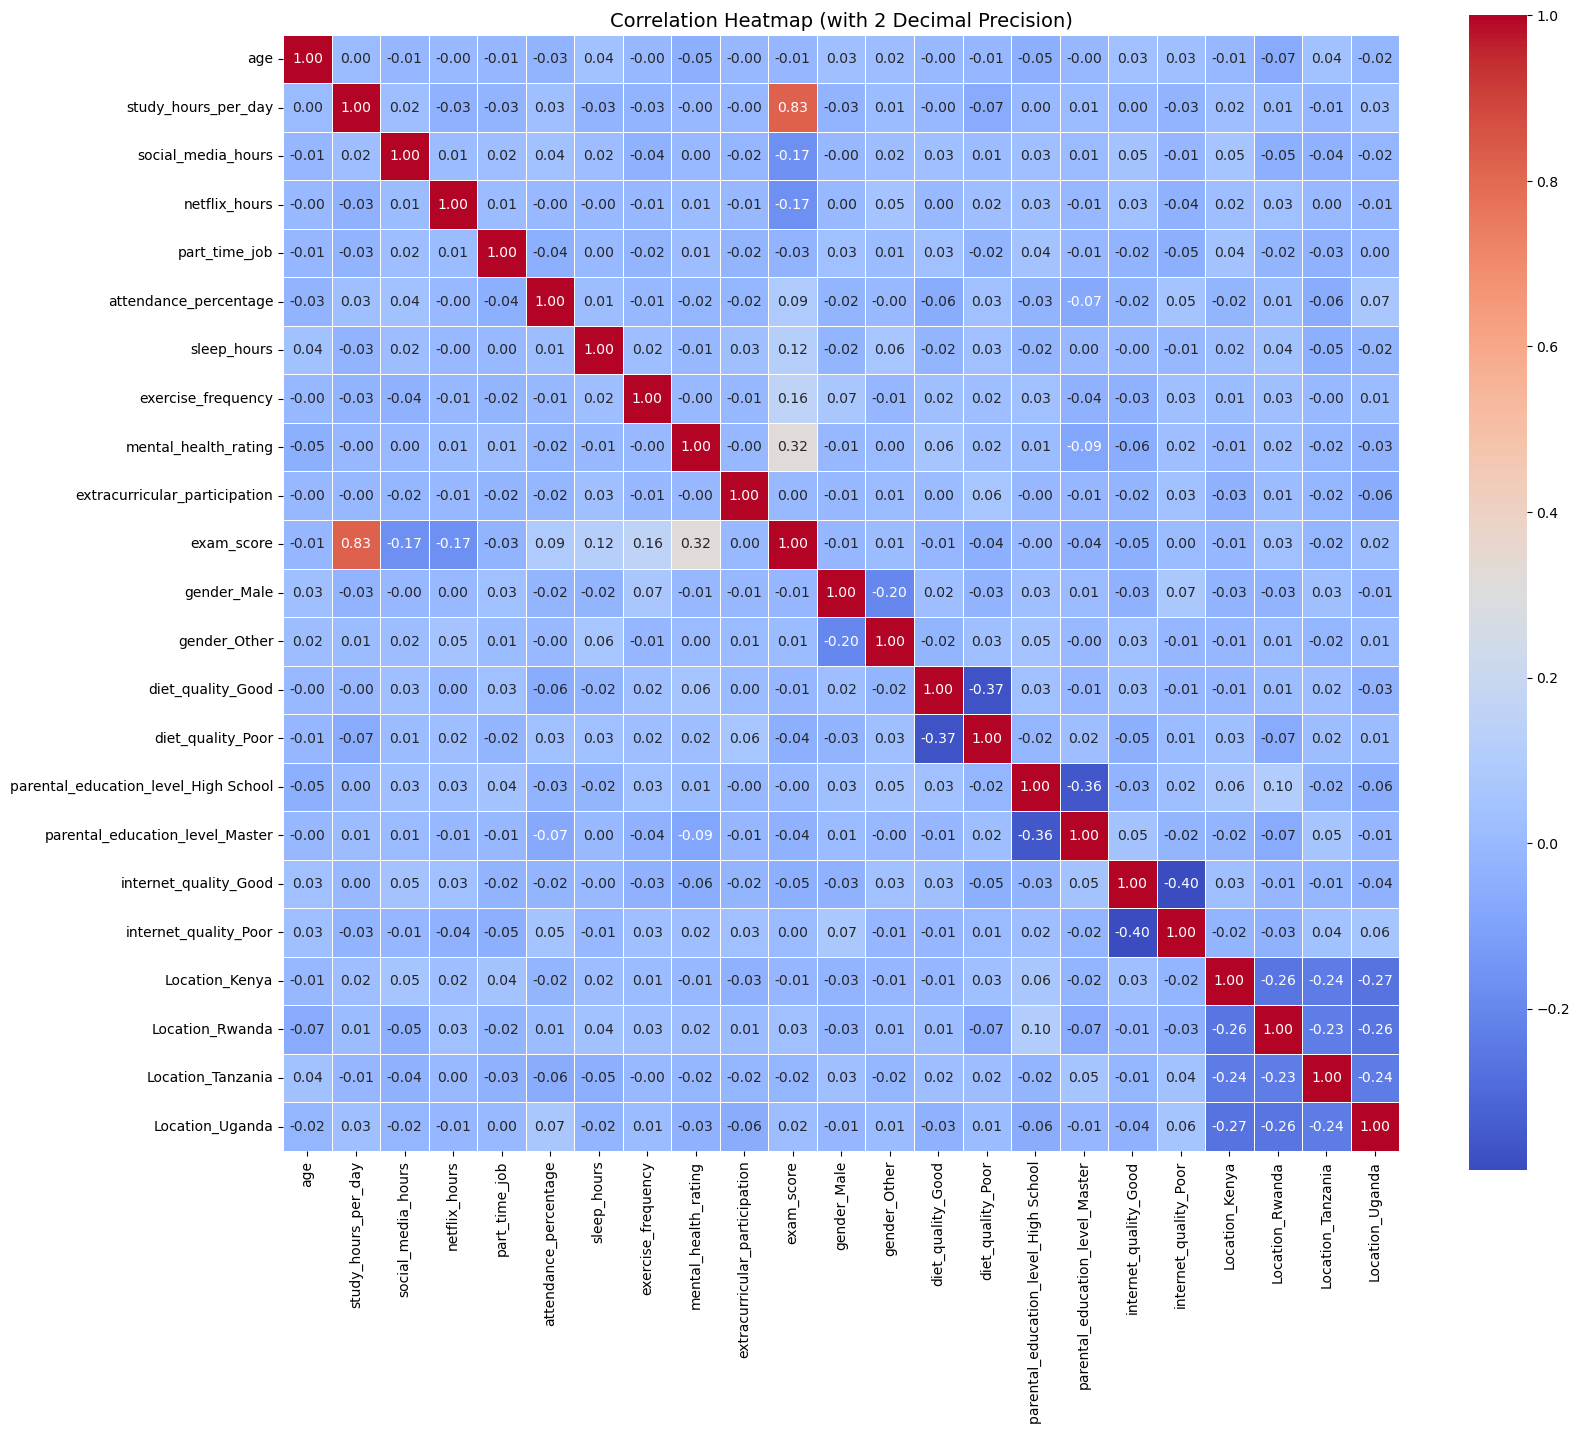

In [4]:
# Set up the correlation matrix
corr_matrix = df.corr()

# Plot heatmap with annotations formatted to 2 decimal places
plt.figure(figsize=(18, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, square=True)
plt.title('Correlation Heatmap (with 2 Decimal Precision)', fontsize=14)
plt.show()

**Interpretation:**

The correlation heatmap helps us identify which features are most strongly associated with the target variable `exam_score`. Features like `study_hours_per_day`, `attendance_percentage`, and `sleep_hours` show strong positive correlations, suggesting that students who dedicate more time to studying, attend class regularly, and maintain a healthy sleep schedule tend to score higher on exams. On the other hand, variables like `social_media_hours` and `netflix_hours` show negative correlations, indicating that excessive screen time may negatively impact performance.

**4.2 Distribution of Exam Scores**

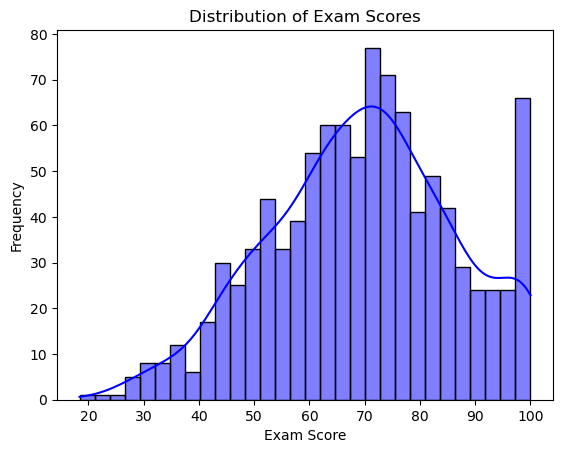

In [5]:
sns.histplot(df['exam_score'], kde=True, bins=30, color='blue')
plt.title('Distribution of Exam Scores')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.show()

**Interpretation:**

The histogram shows that most students score around the `mid-range` (likely between `60–80`), with a `slight right skew`. This suggests that while a few students achieve high scores, many cluster around the average. The KDE (density) curve confirms this central tendency and highlights a relatively `normal distribution` with moderate variation.

**4.3 Scatter Plot: Study Hours vs. Exam Score**

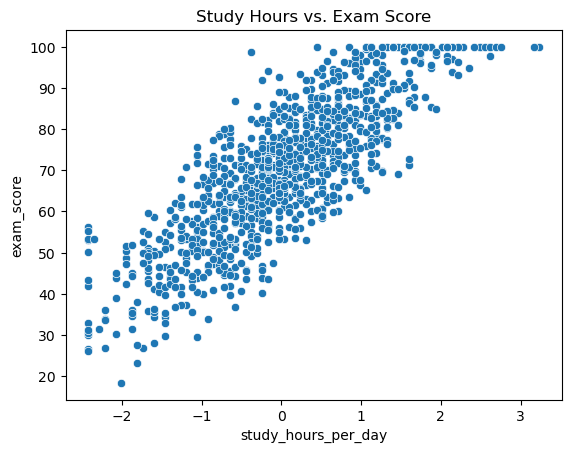

In [6]:
sns.scatterplot(data=df, x='study_hours_per_day', y='exam_score')
plt.title('Study Hours vs. Exam Score')
plt.show()

**Interpretation**

This scatter plot shows a clear upward trend, indicating a `strong positive correlation` between `study time` and `exam performance`. Students who study more hours per day tend to achieve higher scores, reinforcing the importance of disciplined academic habits. However, there's some scatter, suggesting other factors (like sleep or stress) may also influence performance.



## 5.Feature Engineering:

**5.1 Selecting Relevant Features**

To improve the model's accuracy and reduce noise, I analyzed the correlation matrix to identify which features contribute meaningfully to predicting `exam_score`.

**Criteria for Feature Selection:**
- Features with strong correlation (positive or negative) to the target variable were retained.
- Features with correlation near zero were considered weak predictors and dropped.
- Features relevant to my mission (such as habits and academic engagement) were retained even with moderate correlation.

**Features Retained:**
- `study_hours_per_day`: Strongest positive correlation (**0.83**), direct impact on academic success.
- `attendance_percentage`: Important for class engagement.
- `sleep_hours`: Affects cognitive performance.
- `exercise_frequency`: Linked to mental well-being and discipline.
- `mental_health_rating`: Aligns with our mission and moderately predicts performance.
- `netflix_hours`, `social_media_hours`: Negatively correlated with exam scores.

**Features Dropped:**
- Weakly or non-correlated features like `internet_quality`, `location`, `parental_education_level`, and `gender` were removed to simplify the model and avoid overfitting.
  
This refined dataset now includes only the most relevant and interpretable features.


In [8]:
# Updated list of columns to drop (now dropping all gender columns too)
columns_to_drop = [
    'gender_Male', 'gender_Other', 'age',
    'Location_Kenya', 'Location_Rwanda', 'Location_Tanzania', 'Location_Uganda',
    'parental_education_level_High School', 'parental_education_level_Master',
    'internet_quality_Good', 'internet_quality_Poor', 'social_media_hours',
    'diet_quality_Good', 'diet_quality_Poor', 'netflix_hours',
    'extracurricular_participation', 'part_time_job'  
]

# Drop the selected columns
df_cleaned = df.drop(columns=columns_to_drop)

# Show remaining features
print("Remaining columns for modeling:")
print(df_cleaned.columns.tolist())

Remaining columns for modeling:
['study_hours_per_day', 'attendance_percentage', 'sleep_hours', 'exercise_frequency', 'mental_health_rating', 'exam_score']


## 6.Linear Regression Model Training

With our cleaned and preprocessed dataset, we now proceed to train a **Linear Regression** model to predict student exam scores.

**Steps Covered:**
1. Split the dataset into training and testing sets.
2. Train a linear regression model using scikit-learn.
3. Evaluate the model on both train and test data.
4. Visualize the predicted vs actual values.
5. Plot a scatter plot showing the fitted regression line.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target
X = df_cleaned.drop(columns=['exam_score'])
y = df_cleaned['exam_score']

# Split into training and test data (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

# Evaluate performance
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Train MSE:", round(train_mse, 2))
print("Test MSE:", round(test_mse, 2))
print("Train R²:", round(train_r2, 2))
print("Test R²:", round(test_r2, 2))

Train MSE: 45.73
Test MSE: 36.4
Train R²: 0.84
Test R²: 0.86


**Interpretation:**

**Model Evaluation Summary**

Our Linear Regression model performed strongly on both training and test data:

- **Train MSE**: 45.73
- **Test MSE**: 36.4 
- **Train R² Score**: 0.84  
- **Test R² Score**: 0.86

**What This Means:**

- The `MSE (Mean Squared Error)` values are relatively low, which means the model is making small average errors in predicting exam scores.
- The `R² score of 0.86` means the model explains `86% of the variance` in exam scores which is excellent for a real-world dataset.
- The similarity between training and test scores suggests that the model is `not overfitting` or underfitting it's learning the underlying patterns well and generalizing effectively to new data.

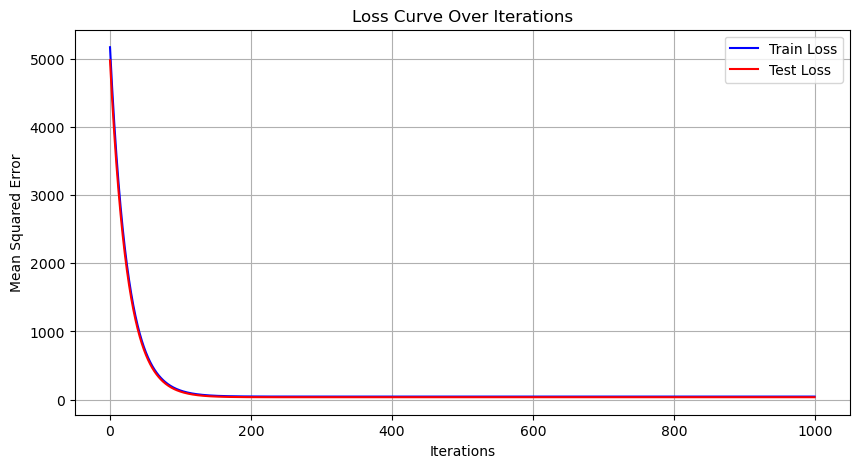

In [16]:
# Initialize parameters
n_features = X_train.shape[1]
weights = np.zeros(n_features)
bias = 0
learning_rate = 0.01
n_iterations = 1000

# Store losses
train_losses = []
test_losses = []

# Gradient Descent Loop
for i in range(n_iterations):
    # Predictions
    y_pred_train = np.dot(X_train, weights) + bias
    y_pred_test = np.dot(X_test, weights) + bias

    # Compute losses
    train_loss = mean_squared_error(y_train, y_pred_train)
    test_loss = mean_squared_error(y_test, y_pred_test)

    # Save losses
    train_losses.append(train_loss)
    test_losses.append(test_loss)

    # Compute gradients
    error = y_pred_train - y_train
    dw = (2 / X_train.shape[0]) * np.dot(X_train.T, error)
    db = (2 / X_train.shape[0]) * np.sum(error)

    # Update weights
    weights -= learning_rate * dw
    bias -= learning_rate * db

# After training, plot the loss curve

plt.figure(figsize=(10, 5))
plt.plot(train_losses, label="Train Loss", color="blue")
plt.plot(test_losses, label="Test Loss", color="red")
plt.title("Loss Curve Over Iterations")
plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.grid(True)
plt.show()

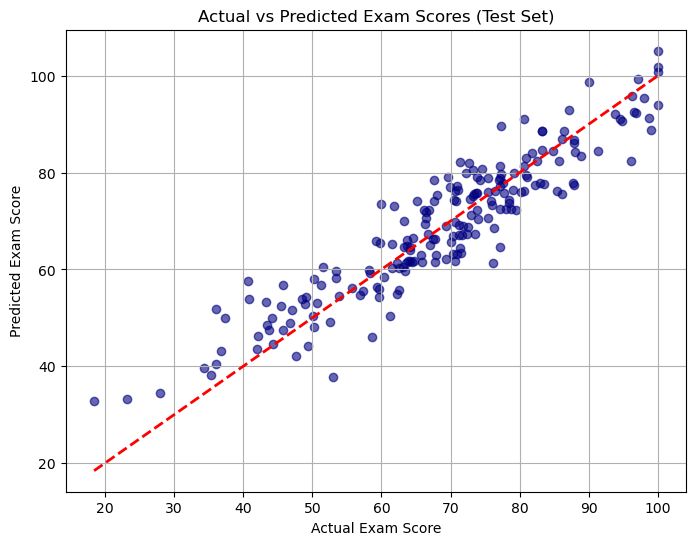

In [12]:
# Scatter plot to show prediction vs actual for test data
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='navy', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', lw=2)
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("Actual vs Predicted Exam Scores (Test Set)")
plt.grid(True)
plt.show()

**Scatter Plot: Predicted vs Actual Exam Scores**

In this plot, each dot represents a student. The X-axis shows their actual exam score, and the Y-axis shows the score predicted by our model. The red dashed line represents a perfect prediction if all dots fell on that line, our predictions would be 100% accurate.

What we observe:

- Most of the dots cluster closely around the red line, which means the model’s predictions are `very close to the actual scores`.
- There are a few minor deviations (dots slightly above or below the line), which are expected in real-world data, no model is perfect.
- There are `no major outliers`, and the pattern confirms the model has learned meaningful relationships.

**In Simple Terms:**
 The model does a great job predicting how well a student might perform on their exam based on their habits and environment. It’s not perfect, but it's pretty smart, it gets it right most of the time!

In [23]:
from sklearn.tree import DecisionTreeRegressor

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print("MSE_Tree:", round(mse_tree, 2))
print("R²_Tree:", round(r2_tree, 2))

MSE_Tree: 85.79
R²_Tree: 0.67


**Decision Tree Regressor**
- Test MSE: 85.79
- Test R² Score: 0.67

**Interpretation:**

The Decision Tree model is underperforming compared to previous results.

`The high MSE (85.79)` means the model's predictions on the test set are, on average, far from the actual values.
`The R² score of  0.67` indicates that the model explains only `67%` of the variance in exam scores, suggesting it is not generalizing well and might be overfitting the training data or lacking sufficient depth or pruning.

**Conclusion:**

This Decision Tree is likely too simple and poorly tuned for the problem at hand.

In [24]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

(mse_rf, r2_rf)
print("MSE_RF:", round(mse_rf, 2))
print("R²_RF:", round(r2_rf, 2))

MSE_RF: 46.33
R²_RF: 0.82


**Random Forest Regressor**

Test MSE: `46.33`

Test R² Score: `0.82`

**Interpretation:**

The Random Forest model is performing significantly better than the Decision Tree.

` A lower MSE (46.33)` indicates that predictions are closer to the actual values.
`The R² score of 0.82` means the model explains 82% of the variance, showing strong predictive power and better generalization to unseen data.

**Conclusion:** 

The ensemble method of averaging across multiple decision trees helps to reduce overfitting and provides a more stable, accurate model.

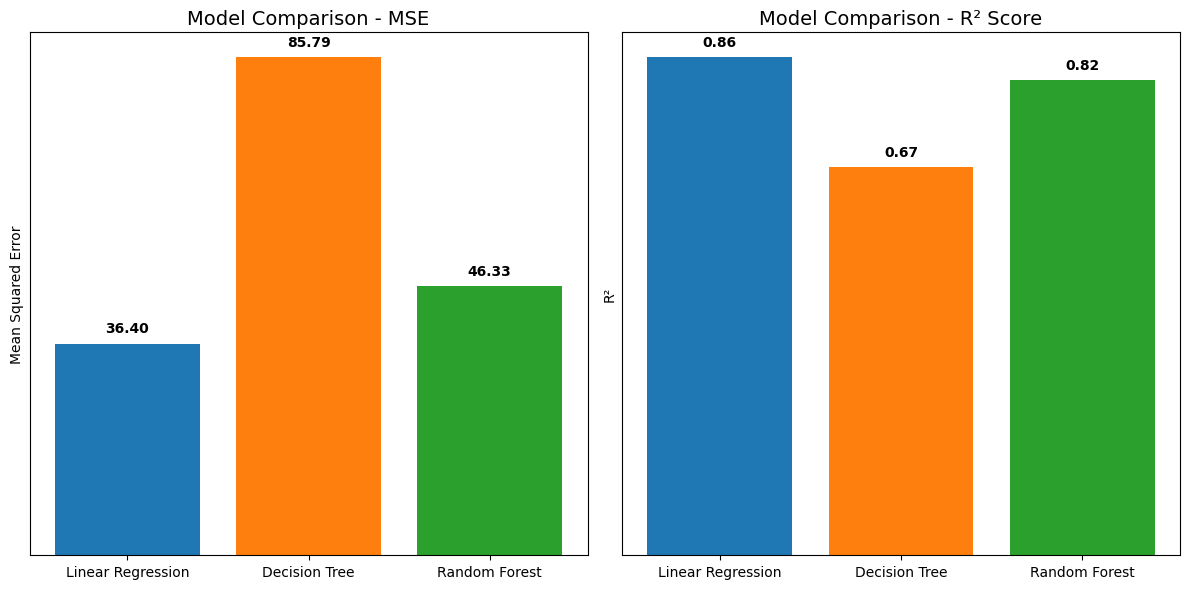

In [25]:
# Models and scores
models = ['Linear Regression', 'Decision Tree', 'Random Forest']
mse_scores = [36.4, 85.79, 46.33]
r2_scores = [0.86, 0.67, 0.82]

# Set color palette
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # visually distinct and appealing

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# MSE Bar Chart
axs[0].bar(models, mse_scores, color=colors)
axs[0].set_title('Model Comparison - MSE', fontsize=14)
axs[0].set_ylabel('Mean Squared Error')
axs[0].tick_params(axis='y', which='both', left=False, labelleft=False)  # Remove y-axis labels and ticks
axs[0].grid(False)  # Remove gridlines
for i, v in enumerate(mse_scores):
    axs[0].text(i, v + 2, f'{v:.2f}', ha='center', fontweight='bold')

# R² Bar Chart
axs[1].bar(models, r2_scores, color=colors)
axs[1].set_title('Model Comparison - R² Score', fontsize=14)
axs[1].set_ylabel('R²')
axs[1].tick_params(axis='y', which='both', left=False, labelleft=False)
axs[1].grid(False)
for i, v in enumerate(r2_scores):
    axs[1].text(i, v + 0.02, f'{v:.2f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

**Model Comparison:**

`Linear Regression` vs `Decision Tree` vs `Random Forest`
To evaluate model performance, I compared three popular regression models using Mean Squared Error (MSE) and R² Score as metrics:

- `MSE (Mean Squared Error)`: Measures the average squared difference between the actual and predicted values. Lower is better.

- `R² Score:` Represents how well the model explains the variability in the data. Closer to 1 means better performance.

**Interpretation:**

- Linear Regression achieved the lowest error `(MSE = 36.40)` and a strong R² of `0.86`, making it the most effective model for this dataset.

- Decision Tree performed the weakest, with the highest error of `85.79` and lowest R² of `0.67`, likely due to overfitting and sensitivity to noise.

Random Forest provided a good balance between bias and variance, resulting in improved accuracy compared to the decision tree. However, it still underperformed compared to the linear regression with an MSE of `46.33` and an R² of `0.82`.

**Conclusion:**

Despite being a simple model, Linear Regression outperformed the others, likely due to the underlying linear relationships in the dataset.

## Saving the best model

**Saving the Best Model: Linear Regression**
After evaluating all models, I identified Linear Regression as the best performer, with the `lowest Mean Squared Error (36.40)` and highest `R² Score (0.86)` on the test set.

To preserve this model for future predictions, I saved it using Python’s joblib module. This allows to:

- Avoid retraining the model each time.

- Reuse the model in different projects or production environments.

- Share the model with teammates or stakeholders.

The model is stored in a file named:

📁 best_model_linear_regression.pkl

In [26]:
import joblib

# Save model and scaler
joblib.dump(lr_model, 'best_model_linear_regression.pkl')
joblib.dump(scaler, 'scaler.pkl')
print("Linear Regression Model and scaler saved successfully.")

Linear Regression Model and scaler saved successfully.


In [27]:
# Load the saved model
loaded_model = joblib.load('best_model_linear_regression.pkl')

# Example prediction
prediction = loaded_model.predict(X_test)